# Euclidean Distance and Nearest Neighbors

## Objectives

* Perform basic data analysis tasks for answering simple analytical questions in Python, Pandas and Numpy. 
* Understand the significance of euclidean distance towards measuring similarity between data items. 
* Calculate distance measures for a toy example in a scalable manner. 

### Introduction

In this lab, you will write methods to calculate the distance of various neighbors from each other in a neighborhood. 

![](http://newsarchive.heart.org/wp-content/uploads/2017/04/neighborhood.jpg)

Let's assume that the $x$ coordinates represent avenues of a neighbor, the $y$ coordinates represent streets.  We will also assume that the distance between each street and the distance between each avenue is the same.

We will work up to a function called `nearest_neighbors` that given a neighbor, finds the other neighbors who are closest.

### Gather the data

Let's declare a variable `neighbors` as a pandas data frame, with each row representing the [name, avenue, street] for each neighbor.

In [298]:
import pandas as pd
neighbors = pd.DataFrame(
              [['Fred', 4, 8],
              ['Suzie', 1, 1], 
              ['Bob', 5, 8], 
              ['Edgar', 6, 13], 
              ['Steven', 3, 6], 
              ['Natalie', 5, 4]], 
    columns = ['Name', 'Avenue', 'Street'])

neighbors

,Name,Avenue,Street
0,Fred,4,8
1,Suzie,1,1
2,Bob,5,8
3,Edgar,6,13
4,Steven,3,6
5,Natalie,5,4


Use this dataframe and build a scatter plot for all 6 neighbors, with avenue placed on x-axis and street placed on y-axis. Label the plot with legend to show each neighbor with different hue value. 

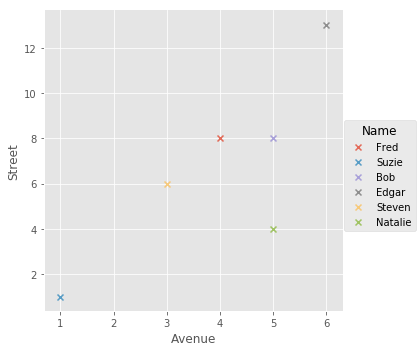

In [299]:
# Plot a scatter plot with avenues at x-axis and street numbers at y-axis

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.lmplot(x='Avenue', y='Street', hue='Name', data=neighbors, fit_reg=False, markers='x' );

We'll start by focusing on the neigbors Fred and Natalie, and points (4, 8) and (5, 4) respectively. 

Create two variables `fred` and `natalie` from above dataframe as numpy arrays. 

In [269]:
# Create two variables ,'fred' and 'natalie' from by reading appropriate rows from neighbors dataframe
fred = np.array(neighbors.loc[neighbors['Name'] == 'Fred'])
natalie = np.array(neighbors.loc[neighbors['Name'] == 'Natalie'])

fred, natalie

# (array([['Fred', 4, 8]], dtype=object),
#  array([['Natalie', 5, 4]], dtype=object))

(array([['Fred', 4, 8]], dtype=object),
 array([['Natalie', 5, 4]], dtype=object))

### Calculating the sides of the triangle

Remember that to calculate the distance, we use the Pythagorean Theorem to calculate the two shorter sides of the right triangle, and from there can calculate the distance, that is the hypotenuse, of the triangle. Let's start with calculating the shorter sides and then use that work to calculate the distance.

Write a function called `street_distance` that takes in numpy arrays and calculates how far in streets two neighbors are from each other. So for example, with Natalie at street 4, and Fred at street 8, our street_distance function should return the number 4. The distance should always be positive.

In [272]:
def street_distance(first_neighbor, second_neighbor):
        d = abs(first_neighbor[0][2] - second_neighbor[0][2])
        return d

Now we execute the code, and as you can see from the comment to the right, our expected returned street distance is $4$.

In [273]:
street_distance(fred, natalie)

# 4

4

Similarly, write a function called `avenue_distance` that calculates how far in avenues two neighbors are from each other. The distance should always be positive.

In [274]:
def avenue_distance(first_neighbor, second_neighbor):
        d = abs(first_neighbor[0][1] - second_neighbor[0][1])
        return d

In [276]:
avenue_distance(fred, natalie)

# 1

1

### Calculating distance

Now let's begin writing functions involved with calculating that hypotenuse of our right triangle.  Using the Pythagorean Theorem, $\sqrt{a^2 + b^2} = c $, write a function called `distance_between_neighbors` that calculates $c$, the length of the hypotenuse by incorporating above functions to calculate sides.

In [277]:
import math

def distance(first_neighbor, second_neighbor):
    
    # Calculate total distance from sides using Pythagoras theorem
    p = street_distance(first_neighbor, second_neighbor) # Perpendicular
    q = avenue_distance(first_neighbor, second_neighbor) # Base
    d = math.sqrt(p**2 + q**2) # Hypotenuse using Pythagoras

    return d

In [278]:
distance(fred, natalie)

# 4.123105625617661

4.123105625617661

### Writing Our "Nearest Neighbors" Functions

This next section will work up to building a nearest_neighbor function. This is a function that given one neighbor, will tell us which neighbors are closest. How do we write something like this? Can we use our calculation of distance between two neighbors to figure out the closest neighbors to an individual?

Sure, we first need to calculate the distances between one neighbor and all of the others. Next, we sort those neighbors by their distance from the selected_neighbor. Finally, we select a given number of the closest neighbors. Let's work through it.

Note that we already have a function that calculates the distance between two neighbors. We may think we could simply use this function to loop through our neighbors, but that would just return an list of distances.

Write function `distance_from_fred` that measures the distance between Fred and each of his neighbors. 

In [280]:
# Write a function that iterates through the dataframe and returns distance of Fred from 
# each of his neighbors

def distance_from_fred():
    
    dis= []
    for index, row in neighbors.iterrows():
        neighbor_iter = [np.array(row)]
        distance_between = round(distance(fred, neighbor_iter), 2)
        dis.append(distance_between)

    return dis

distance_from_fred()

# [0.0, 7.62, 1.0, 5.39, 2.24, 4.12]

[0.0, 7.62, 1.0, 5.39, 2.24, 4.12]

The returned list from the above procedure isn't super helpful. We need to know the person associated with each distance.

So let's accomplish this by writing a function called `distance_with_neighbor` that works like our distance function but instead of returning a float, returns a list representing the second_neighbor's attributes.

In [284]:
# Create a function to calculate the distance of second neighbor from first
# Return the features (name, avenue, street) of second neighbor

def distance_with_neighbor(first_neighbor, second_neighbor):
    
    d = distance(first_neighbor, second_neighbor)
    n1_name = first_neighbor[0][0]
    n2_name = second_neighbor[0][0]
    n2_st = second_neighbor[0][2]
    n2_ave = second_neighbor[0][1]
    
    return [n1_name, n2_name, n2_ave, n2_st, round(d, 2)]


In [285]:
distance_with_neighbor(fred, natalie)

# ['Fred', 'Natalie', 5, 4, 4.12]

['Fred', 'Natalie', 5, 4, 4.12]

Now write a function called `distance_all` that returns an array representing the distances between a first_neighbor and the rest of the neighhbors in different rows using above format. The list should not return the first_neighbor in its collection of neighbors (as the distance will always be 1).

In [288]:
# Write a function to measure the distance of first_neighbor to all others
# Return output as above

def distance_all(first_neighbor, neighbors):
    
    data = []
    
    for index, row in neighbors.iterrows():
        n = [np.array(row)]

        if n[0][0] == first_neighbor[0][0]:
            pass
        else:
            out = distance_with_neighbor(first_neighbor, n) 
            data.append(out)
   
    return data       

In [239]:
d = distance_all(fred, neighbors)
d

# [['Fred', 'Suzie', 1, 1, 7.62],
#  ['Fred', 'Bob', 5, 8, 1.0],
#  ['Fred', 'Edgar', 6, 13, 5.39],
#  ['Fred', 'Steven', 3, 6, 2.24],
#  ['Fred', 'Natalie', 5, 4, 4.12]]

[['Fred', 'Suzie', 1, 1, 7.62],
 ['Fred', 'Bob', 5, 8, 1.0],
 ['Fred', 'Edgar', 6, 13, 5.39],
 ['Fred', 'Steven', 3, 6, 2.24],
 ['Fred', 'Natalie', 5, 4, 4.12]]

In [287]:
d = distance_all(natalie, neighbors)
d

# [['Natalie', 'Fred', 4, 8, 4.12],
#  ['Natalie', 'Suzie', 1, 1, 5.0],
#  ['Natalie', 'Bob', 5, 8, 4.0],
#  ['Natalie', 'Edgar', 6, 13, 9.06],
#  ['Natalie', 'Steven', 3, 6, 2.83]]

[['Natalie', 'Fred', 4, 8, 4.12],
 ['Natalie', 'Suzie', 1, 1, 5.0],
 ['Natalie', 'Bob', 5, 8, 4.0],
 ['Natalie', 'Edgar', 6, 13, 9.06],
 ['Natalie', 'Steven', 3, 6, 2.83]]

Finally, write a function called `nearest_neighbors` that given a neighbor, returns an list of neighbors, ordered from closest to furthest from the neighbor. The function should take an third argument that specifies how many "nearest" neighbors are returned.

In [289]:
# Write a function to use distance_all(), sort the data based on distance 
# Return a specified number of top neighbors

from operator import itemgetter
def nearest_neighbors(first_neighbor, neighbors, number = None):
    data = distance_all(first_neighbor, neighbors)
    data_sorted = sorted(data, key=itemgetter(4))
    return data_sorted[:number]

In [290]:
nearest_neighbors(fred, neighbors, 3)

# [['Fred', 'Bob', 5, 8, 1.0],
#  ['Fred', 'Steven', 3, 6, 2.24],
#  ['Fred', 'Natalie', 5, 4, 4.12]]

[['Fred', 'Bob', 5, 8, 1.0],
 ['Fred', 'Steven', 3, 6, 2.24],
 ['Fred', 'Natalie', 5, 4, 4.12]]

In [291]:
nearest_neighbors(natalie, neighbors, 4)

# [['Natalie', 'Steven', 3, 6, 2.83],
#  ['Natalie', 'Bob', 5, 8, 4.0],
#  ['Natalie', 'Fred', 4, 8, 4.12],
#  ['Natalie', 'Suzie', 1, 1, 5.0]]

[['Natalie', 'Steven', 3, 6, 2.83],
 ['Natalie', 'Bob', 5, 8, 4.0],
 ['Natalie', 'Fred', 4, 8, 4.12],
 ['Natalie', 'Suzie', 1, 1, 5.0]]

### Summary

In this lab, you built out the nearest neighbors.  We'll review building out these functions in the next section for a real problem.